In [4]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go


pd.options.display.max_columns = None

listings = pd.read_csv('listings_sep_09_2020.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200909043044,2020-09-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64617,-79.42451,Entire house,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Shampoo"", ""TV"", ""Dryer"", ""Indoor fireplace"",...",$469.00,4,730,4,4,730,730,4.0,730.0,NaN,t,0,0,0,0,2020-09-09,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.11
1,8077,https://www.airbnb.com/rooms/8077,20200909043044,2020-09-10,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64105,-79.37628,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Shampoo"", ""TV"", ""Pool"", ""Gym"", ""Free parking...",$99.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2020-09-10,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.25
2,12604,https://www.airbnb.com/rooms/12604,20200909043044,2020-09-09,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlou...,NaN,https://a0.muscache.com/pictures/5282025/91fca...,48239,https://www.airbnb.com/users/show/48239,Rona,2009-10-25,"Toronto, Ontario, Canada","I love travelling and exploring new places, ma...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/48239/profile...,https://a0.muscache.com/im/users/48239/profile...,The Annex,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Annex,NaN,43.66724,-79.41598,Private room in house,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Indoor fireplace"", ""Wifi""]",$66.00,1,10,1,1,10,10,1.0,10.0,NaN,t,0,0,0,0,2020-09-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20200909043044,2020-09-10,Queen Bedroom close to downtown,<b

In [27]:
ngh_counts = listings.groupby(['neighbourhood_cleansed']).size().reset_index(name = 'Counts').sort_values(by = ['Counts'], ascending = False)

ngh_counts = ngh_counts[ngh_counts.neighbourhood_cleansed.isin(['Waterfront Communities-The Island', 'Niagara', 'Annex', 'Church-Yonge Corridor', 'Bay Street Corridor'])]
ngh_counts.head()

,neighbourhood_cleansed,Counts
122,Waterfront Communities-The Island,3291
87,Niagara,836
3,Annex,630
23,Church-Yonge Corridor,628
6,Bay Street Corridor,584


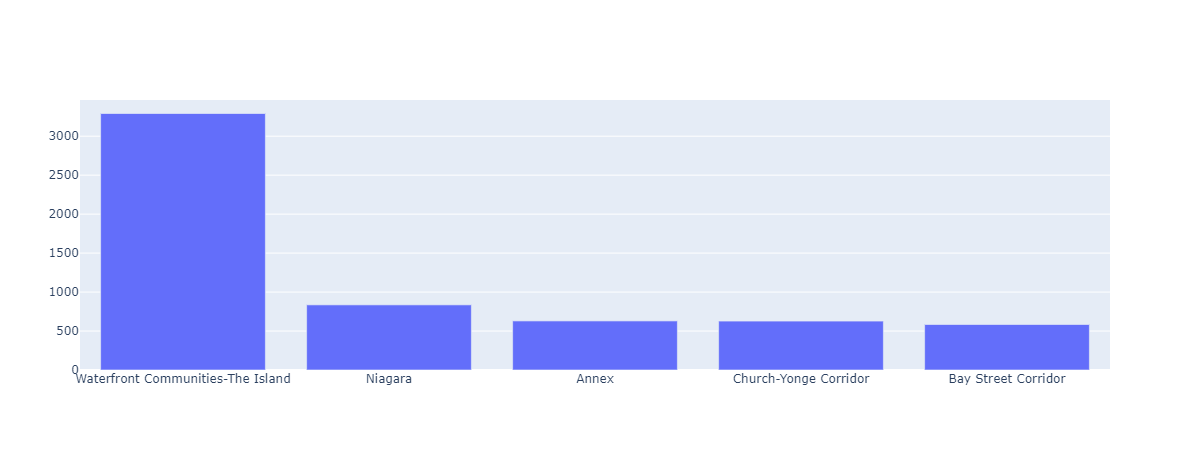

In [28]:
figCntVSNgh = go.Figure([go.Bar(x = ngh_counts['neighbourhood_cleansed'], y = ngh_counts['Counts'])])
figCntVSNgh.show()

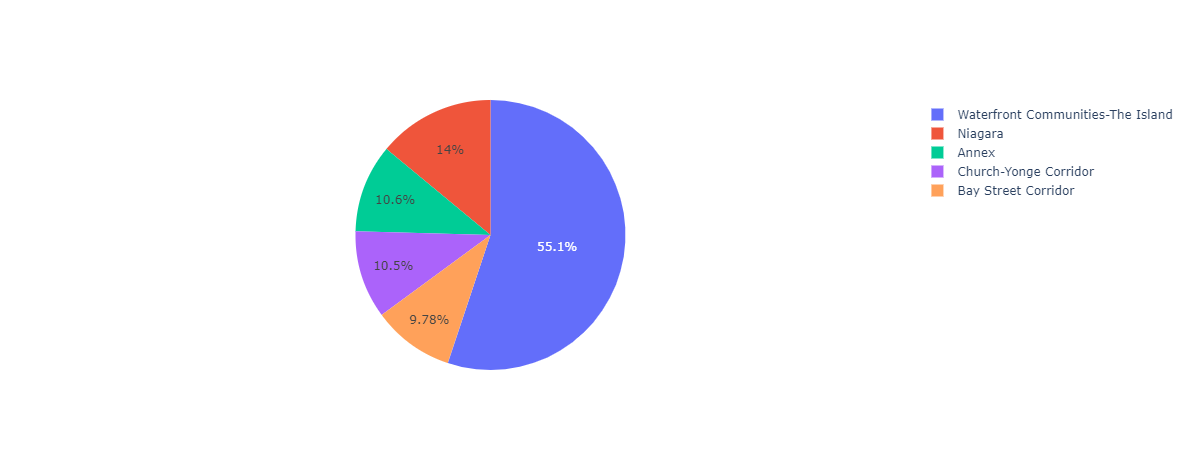

In [29]:
figCntNghPie = go.Figure([go.Pie(labels = ngh_counts['neighbourhood_cleansed'], values = ngh_counts['Counts'])])
figCntNghPie.show()

In [3]:
import folium

In [30]:
latitude = 43.651070
longitude = -79.347015

TRT_geo = r'neighbourhoods.geojson'

TRT_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

bins = list(ngh_counts['Counts'].quantile([0, 0.25, 0.5, 0.75, 0.95, 0.99, 1]))

TRT_map.choropleth(
    geo_data=TRT_geo,
    data=ngh_counts,
    columns=['neighbourhood_cleansed', 'Counts'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Airbnbs in Toronto',
    bins = bins
)

TRT_map